In [1]:
import requests
from pprint import pprint
import json

In [113]:
def get_price(market:str, exchange:str):
  assert market in ['BTC', 'ETH', 'XRP']
  assert exchange in ['UPBIT', 'BINANCE', 'COINBASE', 'OKX']

  if exchange == 'UPBIT':
    res = json.loads(requests.get("https://api.upbit.com/v1/ticker", params={"markets":f'KRW-{market},KRW-USDT'}).text)
    krw_price = res[0]['trade_price']
    usdt_rate = res[1]['trade_price']
    return krw_price/usdt_rate
  elif exchange == 'BINANCE':
    res = json.loads(requests.get("https://api.binance.com/api/v3/ticker/price", params={"symbol":f'{market}USDT'}).text)
    price = res['price']

    return float(price)
  elif exchange == 'COINBASE':
    res = json.loads(requests.get(f"https://api.exchange.coinbase.com/products/{market}-USDT/ticker").text)
    price = res['price']

    return float(price)
  elif exchange == 'OKX':
    res = json.loads(requests.get(f"https://www.okx.com/api/v5/market/index-tickers?instId={market}-USDT").text)
    price = res['data'][0]['idxPx']

    return float(price)
  
  

    

In [47]:
[get_price('BTC', m) for m in ['UPBIT', 'BINANCE', 'COINBASE', 'OKX']]

[64191.473448017954, 64175.23, 64167.43, 64175.1]

In [48]:
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(max_workers=10) as pool:
    res = list(pool.map(lambda m:get_price('BTC', m),['UPBIT', 'BINANCE', 'COINBASE', 'OKX']))
print(res)

[64191.473448017954, 64175.22, 64167.43, 64176.5]


In [99]:
import time
arr = []
for i in range(3600):
    try:
      with ThreadPoolExecutor(max_workers=10) as pool:
        res = list(pool.map(lambda m:get_price('BTC', m),['UPBIT', 'BINANCE', 'COINBASE', 'OKX']))
      arr.append(res)
      print("{:4d} : {:.1f} {:.1f} {:.1f} {:.1f}".format(i, *res))
      time.sleep(1)
    except Exception as e:
       print(e)
       
       pass

   0 : 63911.7 63917.0 63942.5 63921.1
   1 : 63896.8 63917.0 63942.5 63921.1
   2 : 63940.2 63917.0 63942.5 63921.1
   3 : 63940.2 63917.0 63942.5 63920.2
   4 : 63940.2 63917.0 63942.5 63920.5
   5 : 63940.2 63917.0 63942.5 63920.5
   6 : 63940.9 63917.0 63942.5 63920.5
   7 : 63940.2 63917.0 63942.5 63920.5
   8 : 63940.2 63917.0 63942.5 63920.5
   9 : 63940.2 63917.0 63942.5 63921.1
  10 : 63940.2 63917.0 63942.5 63921.1
  11 : 63940.2 63917.0 63942.5 63920.9
  12 : 63940.9 63917.0 63942.5 63920.9
  13 : 63940.2 63917.0 63942.5 63920.9
  14 : 63940.9 63917.0 63942.5 63922.8
  15 : 63940.9 63917.0 63942.5 63923.3
  16 : 63940.9 63917.0 63942.5 63922.8
  17 : 63940.9 63917.0 63942.5 63922.1
  18 : 63949.1 63917.0 63942.5 63922.1
  19 : 63949.1 63917.0 63942.5 63921.3
  20 : 63949.1 63917.0 63942.5 63921.3
  21 : 63949.1 63917.0 63942.5 63921.3
  22 : 63949.1 63917.0 63920.8 63923.1
  23 : 63949.1 63917.0 63920.8 63922.5
  24 : 63949.1 63917.0 63920.8 63922.3
  25 : 63949.1 63917.0 63

KeyboardInterrupt: 

In [96]:
"{:3d}".format(1)

'  1'

In [106]:
with ThreadPoolExecutor(max_workers=10) as pool:
  res = list(pool.map(lambda m:get_price('BTC', m),['UPBIT', 'BINANCE', 'COINBASE', 'OKX']))
print(res)

[{'market': 'KRW-BTC', 'trade_date': '20240824', 'trade_time': '155900', 'trade_date_kst': '20240825', 'trade_time_kst': '005900', 'trade_timestamp': 1724515140255, 'opening_price': 85600000.0, 'high_price': 86390000.0, 'low_price': 85155000.0, 'trade_price': 85481000.0, 'prev_closing_price': 85600000.0, 'change': 'FALL', 'change_price': 119000.0, 'change_rate': 0.0013901869, 'signed_change_price': -119000.0, 'signed_change_rate': -0.0013901869, 'trade_volume': 8.286e-05, 'acc_trade_price': 151208578305.48853, 'acc_trade_price_24h': 336413238771.7003, 'acc_trade_volume': 1762.86582116, 'acc_trade_volume_24h': 3936.49459255, 'highest_52_week_price': 105000000.0, 'highest_52_week_date': '2024-03-14', 'lowest_52_week_price': 34100000.0, 'lowest_52_week_date': '2023-09-11', 'timestamp': 1724515140277}, {'market': 'KRW-USDT', 'trade_date': '20240824', 'trade_time': '155843', 'trade_date_kst': '20240825', 'trade_time_kst': '005843', 'trade_timestamp': 1724515123831, 'opening_price': 1337.0, 

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [103]:
requests.get(f"https://api.exchange.coinbase.com/products/BTC-USDT/ticker").text

'{"ask":"63975","bid":"63963.34","volume":"676.42169321","trade_id":23559449,"price":"63981.28","size":"0.02446331","time":"2024-08-24T15:57:51.320902Z","rfq_volume":"0.358440"}'

In [105]:
market='BTC'
requests.get(f"https://www.okx.com/api/v5/market/index-tickers?instId={market}-USDT").text

'{"code":"0","msg":"","data":[{"instId":"BTC-USDT","idxPx":"63970.1","high24h":"64963.6","sodUtc0":"64038.9","open24h":"61549.4","low24h":"61346.9","sodUtc8":"61537.4","ts":"1724515134012"}]}'

In [112]:
requests.get("https://api.binance.com/api/v3/ticker/price", params={"symbol":f'{market}USDT'}).text

'{"symbol":"BTCUSDT","price":"64003.19000000"}'

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
y = np.array(arr)

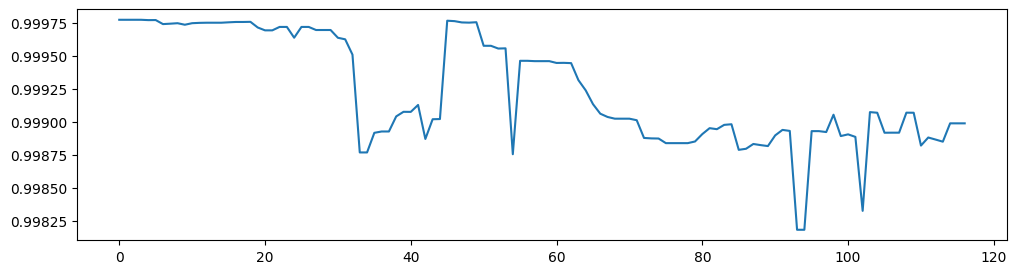

In [78]:
plt.figure(figsize=(12,3))
plt.plot(y[:,0]/(y[:,1]+y[:,2]+y[:,3])*3)


In [90]:
y.shape

(117, 4)

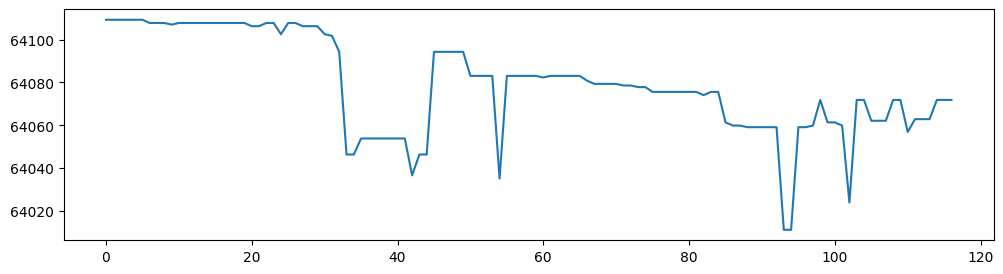

In [79]:
plt.figure(figsize=(12,3))
plt.plot(y[:,0])


ValueError: x and y must have same first dimension, but have shapes (117,) and (3600,)

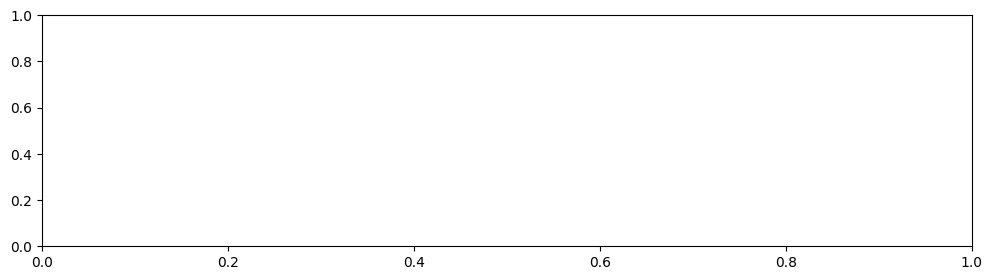

In [89]:
t = np.linspace(0,60,3600)
plt.figure(figsize=(12,3))
plt.plot(y[:,0], t)
plt.plot(y[:,1], t)
plt.plot(y[:,2], t)
plt.plot(y[:,3], t)
